In [1]:
import numpy as np
import mielib as mie

import matplotlib.pyplot as plt
plt.rcdefaults()
plt.style.use('https://raw.githubusercontent.com/toftul/plt-styles-phys/main/phys-plots-sans.mplstyle')

# Optics

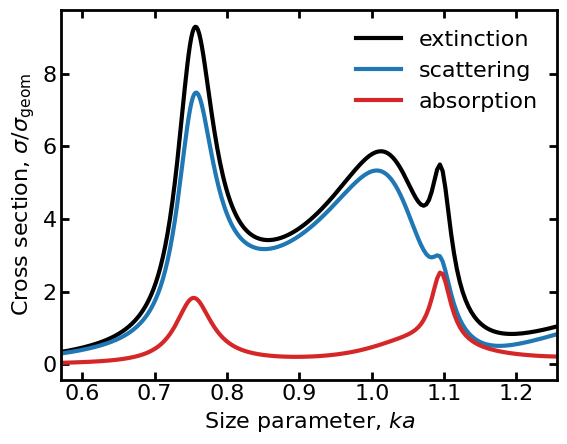

In [2]:
nano = 1e-9

eps_p = 16 + 0.3j
mu_p = 1

eps_h = 1
mu_h = 1

a = 100 * nano
wl_array = np.linspace(500*nano, stop=1100*nano, num=300)
k0 = 2*np.pi / wl_array
k = np.sqrt(eps_h * mu_h) * k0

sigma_sc, _, _  = mie.optics_scattering_cross_section(k0, a, eps_p, mu_p, eps_h, mu_h, norm='geom')
sigma_abs, _, _ = mie.optics_absorption_cross_section(k0, a, eps_p, mu_p, eps_h, mu_h, norm='geom')
sigma_ext, _, _ = mie.optics_extinction_cross_section(k0, a, eps_p, mu_p, eps_h, mu_h, norm='geom')

plt.plot(k*a, sigma_ext, c='k', label='extinction')
plt.plot(k*a, sigma_sc, label='scattering')
plt.plot(k*a, sigma_abs, label='absorption')
plt.xlabel('Size parameter, $ka$')
plt.ylabel('Cross section, $\sigma/\sigma_{\mathrm{geom}}$')

plt.legend()

plt.show()

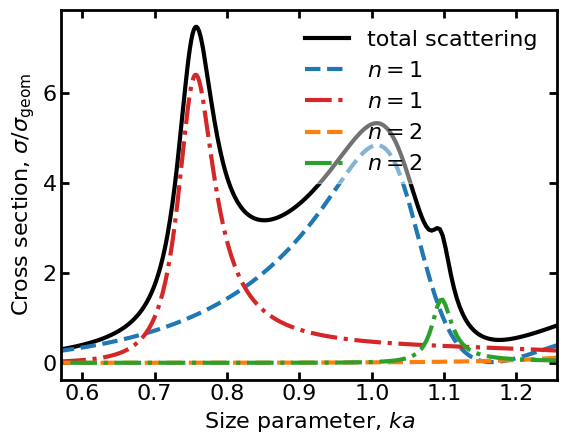

In [3]:
eps_p = 16 + 0.3j
mu_p = 1

eps_h = 1
mu_h = 1

a = 100 * nano
wl_array = np.linspace(500*nano, stop=1100*nano, num=300)
k0 = 2*np.pi / wl_array
k = np.sqrt(eps_h * mu_h) * k0

sigma_sc, sigma_sc_n_electric, sigma_sc_n_magnetic  = mie.optics_scattering_cross_section(k0, a, eps_p, mu_p, eps_h, mu_h, norm='geom')

plt.plot(k*a, sigma_sc, c='k', label='total scattering')

for n in range(1, 3):
    plt.plot(k*a, sigma_sc_n_electric[n, :], ls='--', label='$n={}$'.format(n))
    plt.plot(k*a, sigma_sc_n_magnetic[n, :], ls='-.', label='$n={}$'.format(n))
    

plt.xlabel('Size parameter, $ka$')
plt.ylabel('Cross section, $\sigma/\sigma_{\mathrm{geom}}$')

plt.legend()

plt.show()

# Acoustics

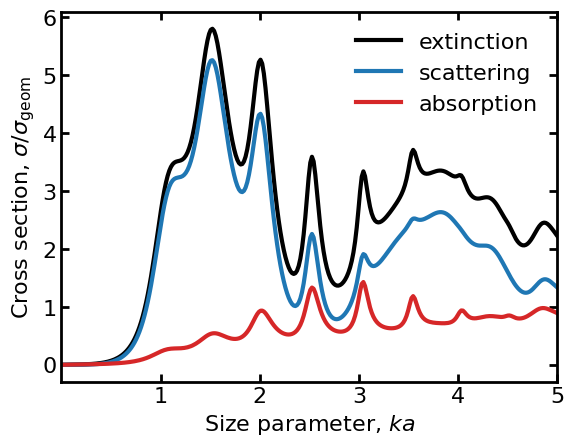

In [6]:
rho_rel = 3 + 0.1j
beta_rel = 2

a = 1
k = np.linspace(0.001, stop=5, num=300)

sigma_sc, _  = mie.acoustics_scattering_cross_section(k, a, rho_rel, beta_rel, norm='geom')
sigma_abs, _ = mie.acoustics_absorption_cross_section(k, a, rho_rel, beta_rel, norm='geom')
sigma_ext, _ = mie.acoustics_extinction_cross_section(k, a, rho_rel, beta_rel, norm='geom')


plt.plot(k*a, sigma_ext, c='k', label='extinction')
plt.plot(k*a, sigma_sc, label='scattering')
plt.plot(k*a, sigma_abs, label='absorption')



plt.xlabel('Size parameter, $ka$')
plt.ylabel('Cross section, $\sigma/\sigma_{\mathrm{geom}}$')

plt.legend()

plt.show()

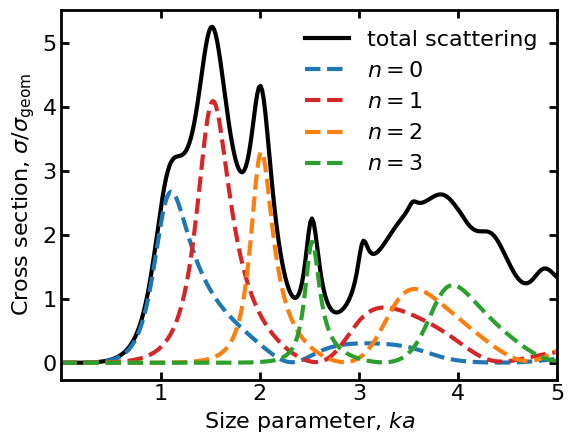

In [7]:
rho_rel = 3 + 0.1j
beta_rel = 2

a = 1
k = np.linspace(0.001, stop=5, num=300)

sigma_sc, sigma_sc_n = mie.acoustics_scattering_cross_section(k, a, rho_rel, beta_rel, norm='geom')

plt.plot(k*a, sigma_sc, c='k', label='total scattering')

for n in range(0, 4):
    plt.plot(k*a, sigma_sc_n[n, :], ls='--', label='$n={}$'.format(n))

plt.xlabel('Size parameter, $ka$')
plt.ylabel('Cross section, $\sigma/\sigma_{\mathrm{geom}}$')

plt.legend()

plt.show()